In [ ]:
!pip install python-igraph

Integrantes:
*   Gabriel Bianchi e Silva - RA: 140399
*   Miguel Silva Taciano - RA: 140756

O projeto a ser apresentado é referente à uma rede de propagação de "fake news", para a implementação serão usadas duas formas diferentes de redes, uma que segue o modelo de "Barabási–Albert", que é a rede livre de escala e a outra rede vai ser a aleatória, de "Erdös-Rényi".

Ambas as redes a serem impolementadas terão como grau médio 4, e serão montadas com a ajuda da biblioteca "igraph".

In [ ]:
import igraph as ig
import random
import numpy as np
import matplotlib.pyplot as plt

A seguir temos a representação em "grafos" da rede livre de escala

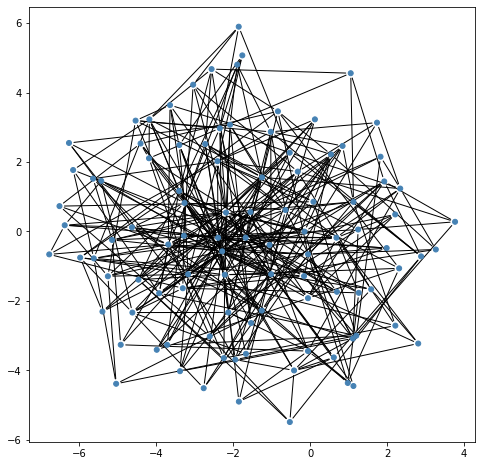

In [ ]:
N = 100
random.seed(2021)
g = ig.Graph.Barabasi(N,4)
fig, ax = plt.subplots()
ig.plot(g, target=ax)

Dentro de cada nó desta rede tem-se aguns atributos, o primeiro é apenas para facilitar a localização do mesmo, e é o número do nó, de 0 a 99, o segundo diz respeito à probabilidade de acreditar na notícia recebida, e o último diz respeito à chance de, ao receber, também espalhar, esses dois últimos foram definidos com o auxílio do random, sendo que a probabilidade de espalhar a notícia é um pouco menor de acreditar, assumindo que existem pessoas que mesmo acreditanto optam por não repassar.

In [ ]:
for i in range(N):
  g.vs[i]["numero"] = i
  g.vs[i]["pAcredita"] = random.uniform(0, 0.1)
  g.vs[i]["pEspalha"] = random.uniform(0, 0.08)

A seguir temos a função base da rede, que vai ser utilizada para as duas que serão implementadas.

In [ ]:
def rede(inicio, g, T):
  estado = np.zeros((N), dtype=int)
  duracao = np.zeros((N), dtype=int)

  estado[inicio] = 1
  g.vs[inicio]["pEspalha"] = 1
  g.vs[inicio]["pAcredita"] = 1

  history = np.copy(estado.T).reshape(-1,1)

  for t in range(1,T):
      novoEstado = estado
      for n in range(N):
        vizinhos = g.neighbors(n)
        if g.vs[n]["pAcredita"] >= random.random():
          for v in vizinhos:
            if estado[v] == 1 and g.vs[v]["pEspalha"] >= random.random():
              novoEstado[n] = 1
        else:
          novoEstado[n] = estado[n]


      history = np.concatenate((history, novoEstado.reshape(-1,1)), axis=1)
      estado = novoEstado
  return history

Analisando agora para o elemento inicial sendo o 32, escolhido aleatóriamente.

In [ ]:
resultado1 = rede(32, g, 300)

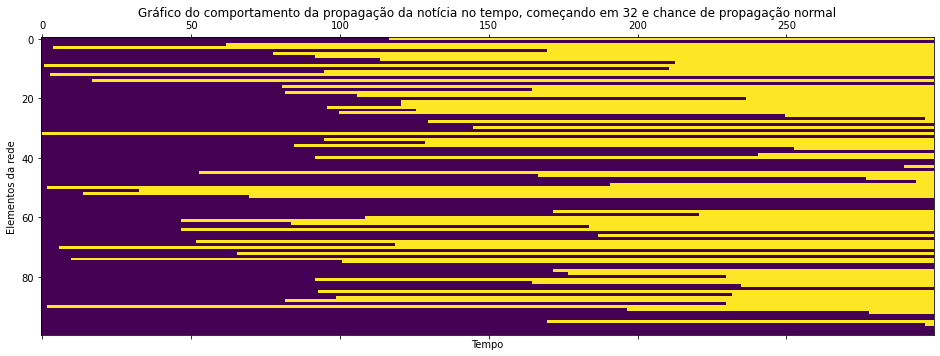

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultado1)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 32 e chance de propagação normal')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Para essa rede, começando em 32, será analisado agora para 2 casos, o primeiro onde a probabilidade de acreditar e repassar a notícia seja de 100% e outro onde essa mesma chance é de 0%.

In [ ]:
gCopia = g.copy()
for i in range(N):
  gCopia.vs[i]["numero"] = i
  gCopia.vs[i]["pAcredita"] = 1
  gCopia.vs[i]["pEspalha"] = 1

In [ ]:
resultado100 = rede(32, gCopia, 3)

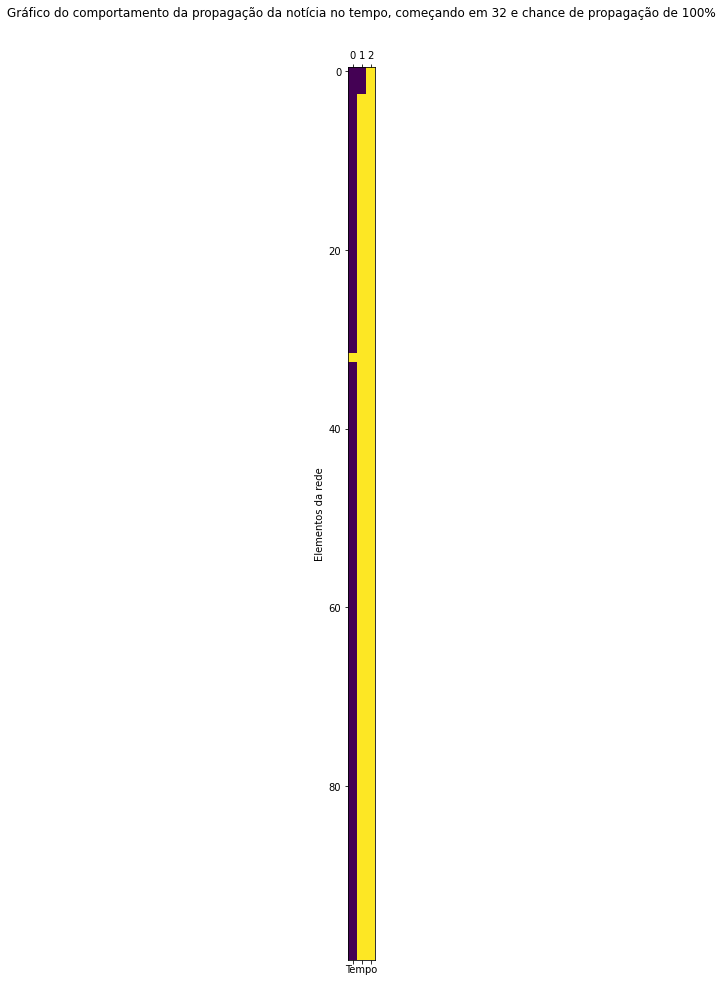

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultado100)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 32 e chance de propagação de 100%')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Nesse caso a propagação é muito mais rápida, e atinge toda a população.

In [ ]:
for i in range(N):
  gCopia.vs[i]["numero"] = i
  gCopia.vs[i]["pAcredita"] = 0
  gCopia.vs[i]["pEspalha"] = 0

In [ ]:
resultado0 = rede(32, gCopia, 300)

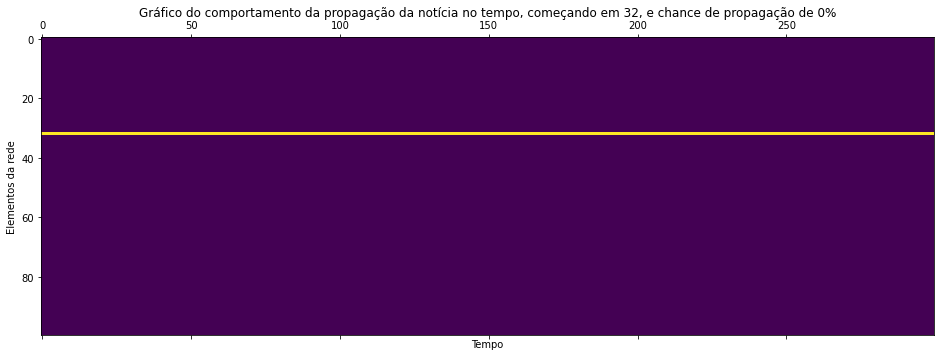

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultado0)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 32, e chance de propagação de 0%')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Nesse, como esperado, se não existe a chance de se repassar a informação, apenas o indivíduo inicial terá ela.

Como o nó que possui mais ligações é o nó 3, ele será analisado separadamente

In [ ]:
resultado2 = rede(3, g, 300)

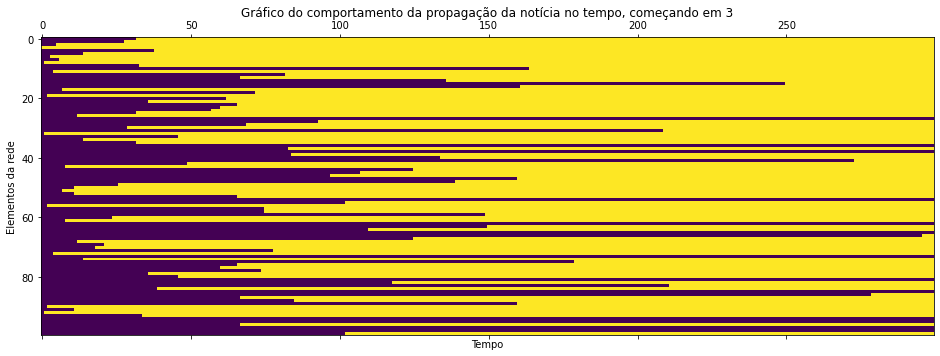

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultado2)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 3')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

E também, analisando o nó 99, que possui apenas 4 conexões, temos:

In [ ]:
resultado3 = rede(99, g, 300)

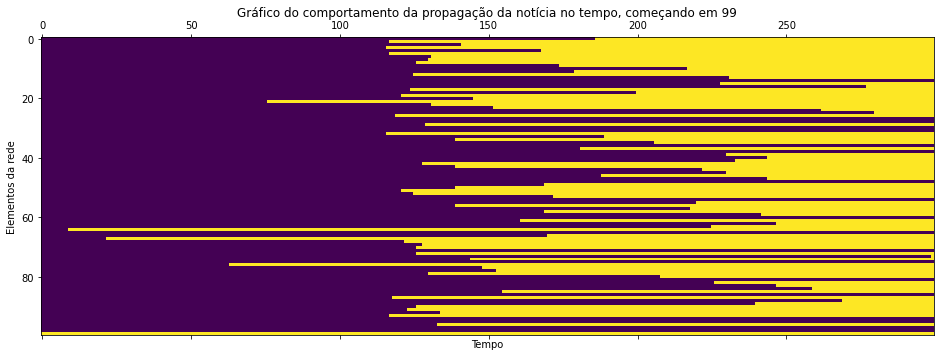

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultado3)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 99')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Analisando agora a probabilidade mínima para que toda a população receba a notícia e acredite:

In [ ]:
for i in range(N):
  g.vs[i]["numero"] = i
  g.vs[i]["pAcredita"] = 0.08
  g.vs[i]["pEspalha"] = 0.08

In [ ]:
resultadoFinal = rede(32, g, 300)

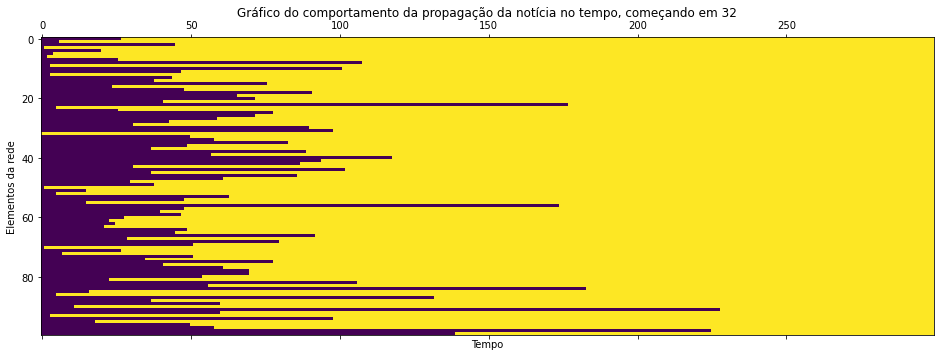

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultadoFinal)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 32')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Assim, a probabilidade mínima é de aproximadamente 8%, para que toda a população receba e acredite na informação.

Analisando agora, com as mesmas probabilidades, porém em uma rede com 5 vezes mais pessoas, e com o mesmo grau.

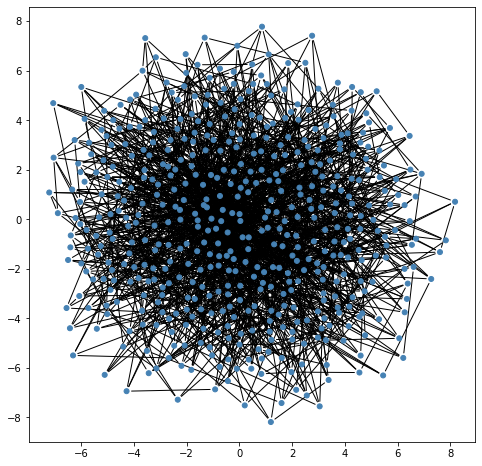

In [ ]:
N = 500
random.seed(2021)
g2 = ig.Graph.Barabasi(N,4)
fig, ax = plt.subplots()
ig.plot(g2, target=ax)

In [ ]:
for i in range(N):
  g2.vs[i]["numero"] = i
  g2.vs[i]["pAcredita"] = random.uniform(0, 0.1)
  g2.vs[i]["pEspalha"] = random.uniform(0, 0.08)

In [ ]:
resultadoRedeMaior = rede(3, g2, 300)

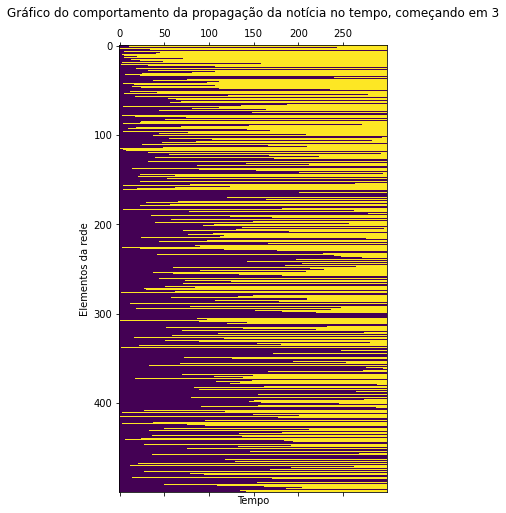

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultadoRedeMaior)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 3')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Nessa nova rede, por possuir muito mais elementos, começando como vértice 3, que também é o que possui o maior número de conexões, a rede demora muito mais tempo para propagar a informação, e ao final do tempo analisado, possui um número muito maior de elementos que não acreditaram.

Seguindo para a rede aleatória, temos:

O grau médio da rede é de: 4.04


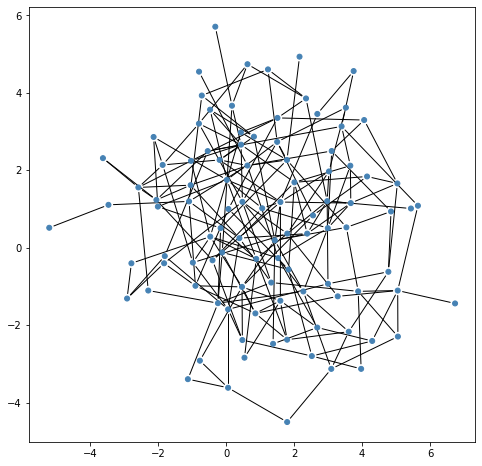

In [ ]:
N = 100
random.seed(2020)
h = ig.Graph.Erdos_Renyi(N, p = 0.04)
fig, ax = plt.subplots()
ig.plot(h, target=ax)
print(f'O grau médio da rede é de: {ig.mean(h.degree())}')

In [ ]:
for i in range(N):
  h.vs[i]["numero"] = i
  h.vs[i]["pAcredita"] = random.uniform(0, 0.2)
  h.vs[i]["pEspalha"] = random.uniform(0, 0.18)

Para essa rede, afim de atingir resultados semelhantes à primeira, a probabilidade deve ser maior.

In [ ]:
resultado4 = rede(83, h, 300)

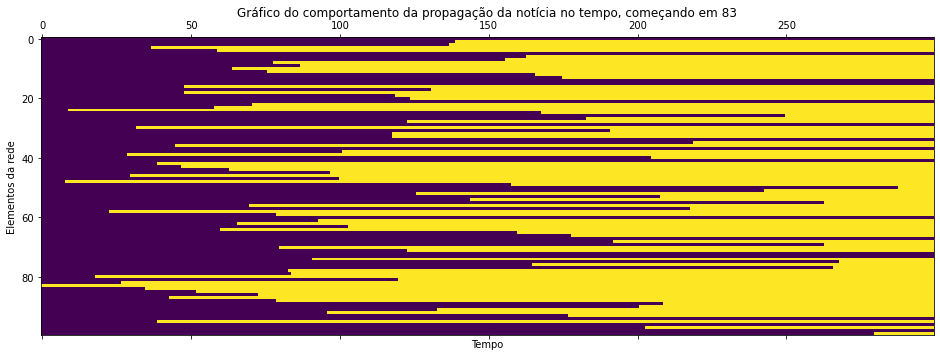

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultado4)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 83')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

O gráfico obtido acima, com as probalidades iguais ao do gráfico livre de escolha mostrou que a notícia não se espalhou rapidamente, muito pelo contrário, com apenas 5 pessoas acretidando nos primeiros 300 dias.

Analisando agora para uma probabilidade bem maior

In [ ]:
for i in range(N):
  h.vs[i]["numero"] = i
  h.vs[i]["pAcredita"] = random.uniform(0, 0.5)
  h.vs[i]["pEspalha"] = random.uniform(0, 0.5)

In [ ]:
resultado5 = rede(random.randint(0, 99), h, 300)

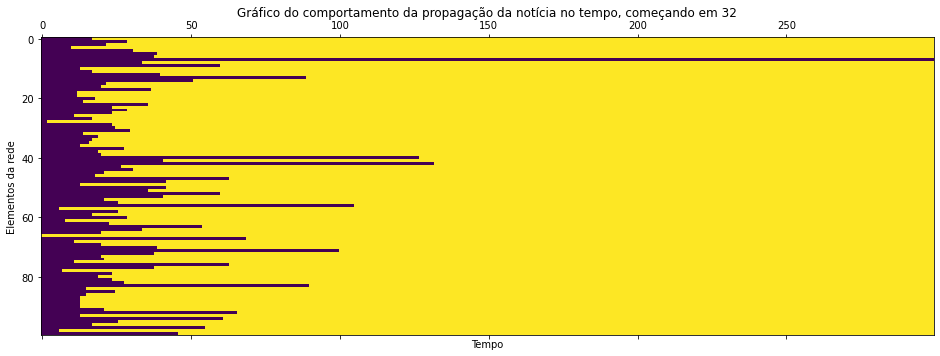

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultado5)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em {inicio}')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Com essa probabilidade bem maior, a notícia se propagou bem mais rapidamente, tendo atingido toda a população em aproximadamente 220 dias

Analisando nesta rede agora para a probabilidade de 100%, assim como feito na primeira, mas começando em 83.

In [ ]:
hCopia = h.copy()
for i in range(N):
  hCopia.vs[i]["numero"] = i
  hCopia.vs[i]["pAcredita"] = 1
  hCopia.vs[i]["pEspalha"] = 1

In [ ]:
resultadoTotal = rede(83, hCopia, 4)

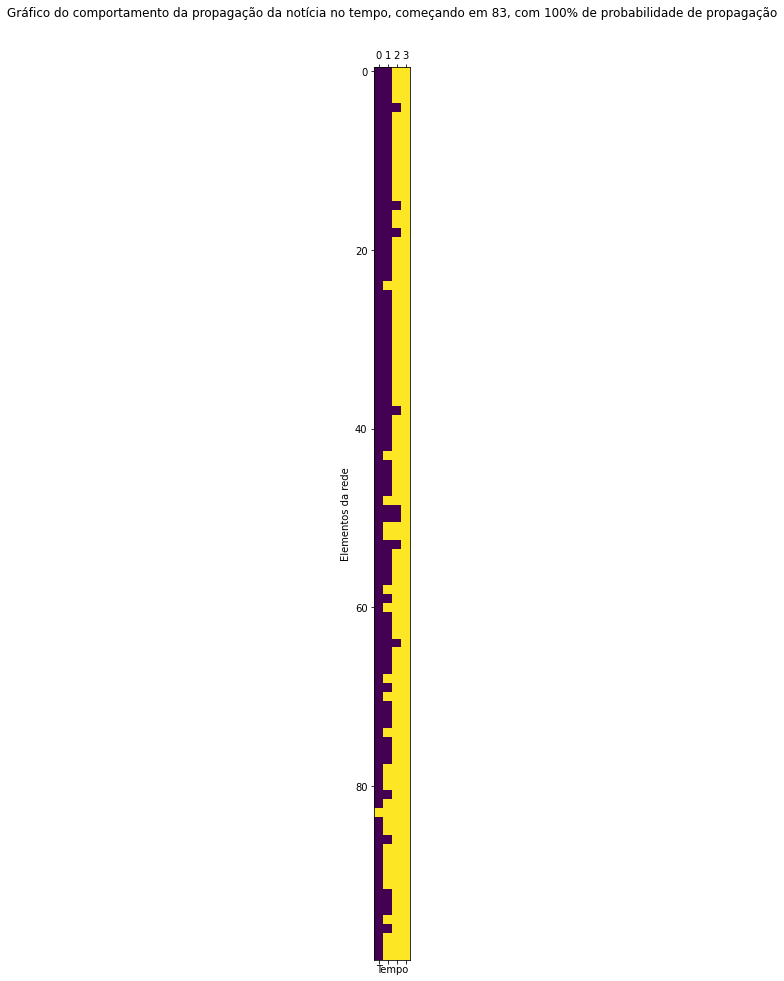

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultadoTotal)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 83, com 100% de probabilidade de propagação')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

E agora, para 0% de chance de propagação:

In [ ]:
for i in range(N):
  hCopia.vs[i]["numero"] = i
  hCopia.vs[i]["pAcredita"] = 0
  hCopia.vs[i]["pEspalha"] = 0

In [ ]:
resultadoTotal0 = rede(83, hCopia, 300)

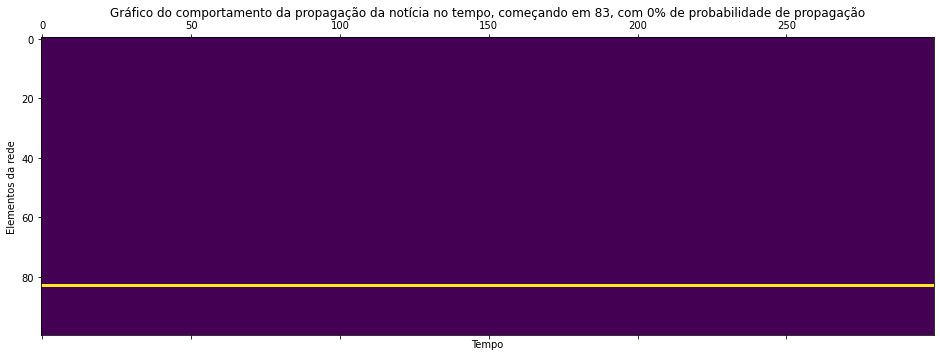

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultadoTotal0)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 83, com 0% de probabilidade de propagação')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Agora, para encontrar o porcentagem mínima para 100% de propagação, assim como na primeira rede, tem-se:

In [ ]:
for i in range(N):
  h.vs[i]["numero"] = i
  h.vs[i]["pAcredita"] = 0.12
  h.vs[i]["pEspalha"] = 0.12

In [ ]:
resultadoFinal2 = rede(83, h, 300)

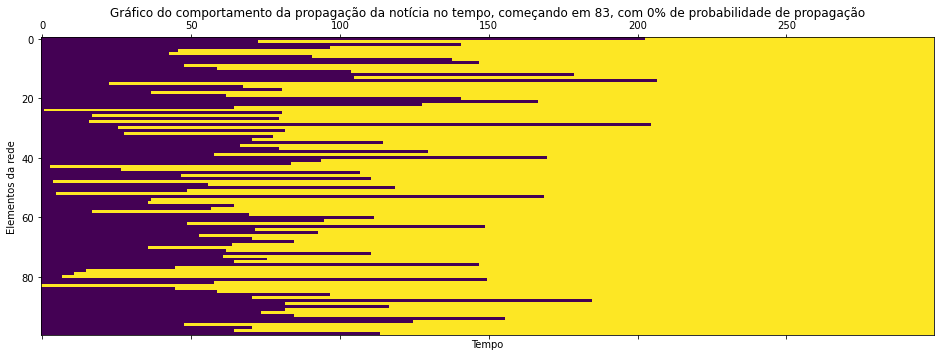

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultadoFinal2)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 83, com 0% de probabilidade de propagação')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

assim, tem-se que é necessário, pelo menos, 12% de probabilidade de transmissão, para que a notícia se espalhe por toda a rede.

Analisando agora, com uma probabilidade diferente, porém em uma rede com 5 vezes mais pessoas, e com o mesmo grau.

O grau médio da rede é de: 4.275999999999995


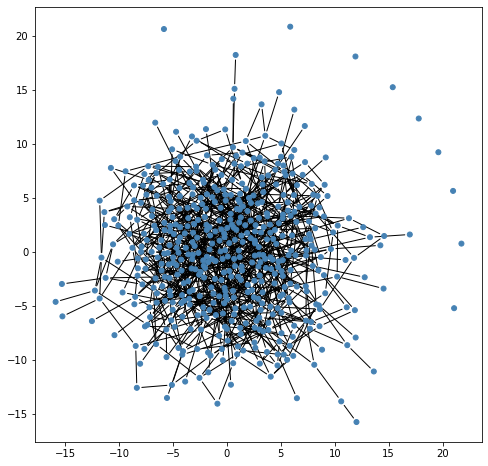

In [ ]:
N = 500
random.seed(2020)
h2 = ig.Graph.Erdos_Renyi(N, p = 0.008)
fig, ax = plt.subplots()
ig.plot(h2, target=ax)
print(f'O grau médio da rede é de: {ig.mean(h2.degree())}')

In [ ]:
for i in range(N):
  h2.vs[i]["numero"] = i
  h2.vs[i]["pAcredita"] = random.uniform(0, 0.2)
  h2.vs[i]["pEspalha"] = random.uniform(0, 0.18)

In [ ]:
resultadoRedeMaior2 = rede(83, h2, 1000)

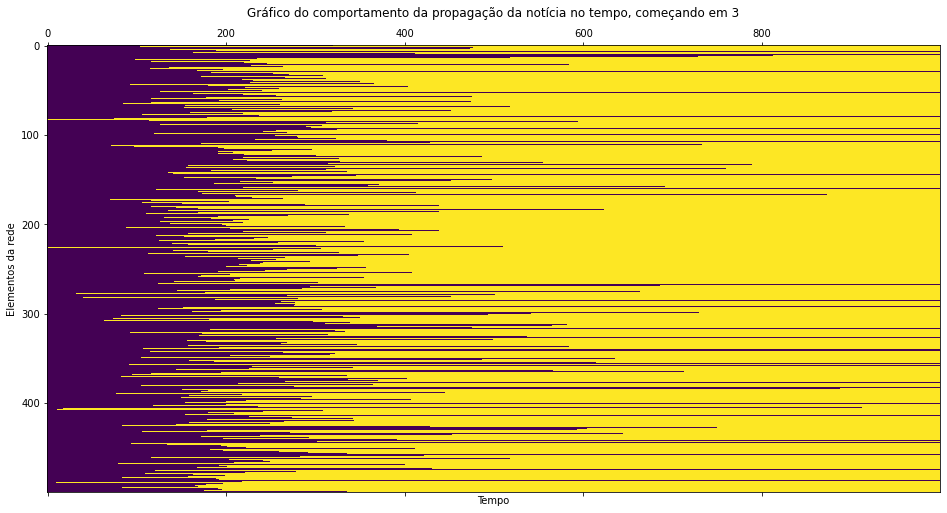

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(resultadoRedeMaior2)

plt.title(f'Gráfico do comportamento da propagação da notícia no tempo, começando em 3')
plt.ylabel('Elementos da rede')
plt.xlabel('Tempo')
plt.show()

Assim como na primeira rede, ao adicionar mais elementos, a propagação é bem mais demorada, e resulta em muito mais elementos que não receberam a notícia, em especial nessa, existem alguns que nunca receberão, pois não estão conectados a outros, como o gráfico de tempo maior demonstra.